In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd  # Make sure pandas is imported in this cell
import numpy as np
#Problem-1
#Load the Dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Display the basic information about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Display the first few rows and perform exploratory
print("\nFirst 5 Rows of the Dataset:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


First 5 Rows of the Dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome         

In [ ]:
#Handling Missing avlues
# Handle missing values (if any)
# Assuming no missing values for diabetes.csv
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

In [ ]:
#Feature Engineering
# Separate features (X) and target (y)
X = df.drop(columns=["Outcome"]).values
y = df["Outcome"].values

# Custom train-test split function
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

# Perform the split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

print("Shapes of Train-Test Splits:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

Shapes of Train-Test Splits:
X_train: (538, 8), X_test: (230, 8)
y_train: (538,), y_test: (230,)


In [ ]:
#Implement KNN
# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to predict the class for a single query point
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)[:k]
    nearest_labels = y_train[sorted_indices]
    return np.bincount(nearest_labels).argmax()

# Function to predict for multiple test samples
def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])


In [ ]:
#Problem-2
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to compute accuracy
def compute_accuracy(y_true, y_pred):
    """Computes the accuracy of a classification model."""
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    return (correct_predictions / total_predictions) * 100

# Evaluate the k-NN algorithm on scaled data
print("Evaluating k-NN with Scaled Data:")

# Test with scaled data
k = 3
y_pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k)
accuracy_scaled = compute_accuracy(y_test, y_pred_scaled)

print(f"Accuracy on Scaled Data with k={k}: {accuracy_scaled:.2f}%")

# Assuming 'accuracy' was calculated on original data in a previous step
# If not, you'll need to calculate it separately
# For example:
# y_pred = knn_predict(X_test, X_train, y_train, k)
# accuracy = compute_accuracy(y_test, y_pred)

# print(f"Accuracy on Original Data with k={k}: {accuracy:.2f}%")


Evaluating k-NN with Scaled Data:
Accuracy on Scaled Data with k=3: 70.87%


Train-test split and feature scaling completed!
k=1: Original Accuracy=68.83%, Scaled Accuracy=63.64%
k=2: Original Accuracy=72.73%, Scaled Accuracy=66.23%
k=3: Original Accuracy=67.53%, Scaled Accuracy=71.00%
k=4: Original Accuracy=72.29%, Scaled Accuracy=68.83%
k=5: Original Accuracy=68.83%, Scaled Accuracy=70.13%
k=6: Original Accuracy=70.13%, Scaled Accuracy=69.26%
k=7: Original Accuracy=69.26%, Scaled Accuracy=69.70%
k=8: Original Accuracy=71.43%, Scaled Accuracy=68.83%
k=9: Original Accuracy=70.13%, Scaled Accuracy=69.70%
k=10: Original Accuracy=71.86%, Scaled Accuracy=69.70%
k=11: Original Accuracy=73.16%, Scaled Accuracy=71.00%
k=12: Original Accuracy=74.03%, Scaled Accuracy=72.29%
k=13: Original Accuracy=74.46%, Scaled Accuracy=71.43%
k=14: Original Accuracy=72.73%, Scaled Accuracy=71.43%
k=15: Original Accuracy=74.03%, Scaled Accuracy=74.03%


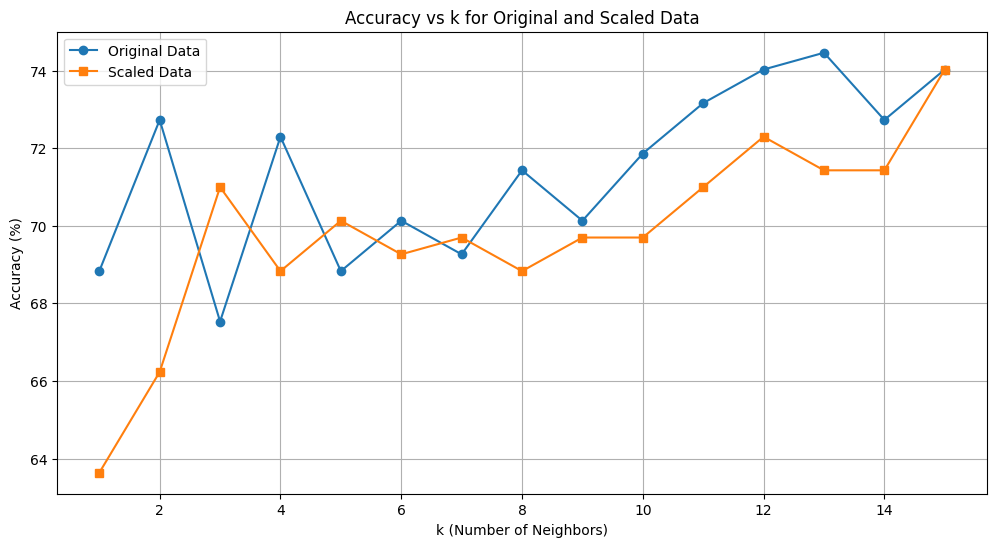

In [6]:
#Problem3
# Import necessary libraries
import pandas as pd # This line is added to import the pandas library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/diabetes.csv")

# Step 2: Split features and target variable
X = df.drop(columns=["Outcome"]).values  # Features
y = df["Outcome"].values  # Target

# Step 3: Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train-test split and feature scaling completed!")

# Step 5: Define k-NN Prediction Functions
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)[:k]
    nearest_labels = y_train[sorted_indices]
    return np.bincount(nearest_labels).argmax()

def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])

def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions / len(y_true)) * 100

# Step 6: Experimentation with Varying k
def experiment_knn_with_scaling(X_train, y_train, X_test, y_test, X_train_scaled, X_test_scaled, k_values):
    results = {"Original": {}, "Scaled": {}}

    for k in k_values:
        # Accuracy on original dataset
        y_pred = knn_predict(X_test, X_train, y_train, k)
        accuracy = compute_accuracy(y_test, y_pred)
        results["Original"][k] = accuracy

        # Accuracy on scaled dataset
        y_pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k)
        accuracy_scaled = compute_accuracy(y_test, y_pred_scaled)
        results["Scaled"][k] = accuracy_scaled

        print(f"k={k}: Original Accuracy={accuracy:.2f}%, Scaled Accuracy={accuracy_scaled:.2f}%")

    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(k_values, list(results["Original"].values()), marker='o', label="Original Data")
    plt.plot(k_values, list(results["Scaled"].values()), marker='s', label="Scaled Data")
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy vs k for Original and Scaled Data')
    plt.legend()
    plt.grid(True)
    plt.show()

    return results

# Step 7: Experiment with k values
k_values = range(1, 16)
results = experiment_knn_with_scaling(X_train, y_train, X_test, y_test, X_train_scaled, X_test_scaled, k_values)
